# Topic Modeling of Hostels

In [16]:
import pandas as pd
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns
%matplotlib inline
from gensim import corpora, models, matutils
from collections import defaultdict
from sklearn.feature_extraction import text
import numpy as np

In [8]:
# import clean revs data

hostels_df = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/clean_hostles_en_oct5.csv')
display(hostels_clean_df.shape, hostels_clean_df.head(2))

(5453, 15)

,Unnamed: 0,rating,desc,FREE,GENERAL,SERVICES,FOOD_DRINK,ENTERTAINMENT,POLICIES,hostel,location,num_awards,rev_highlights,country,city
0,0,2.0,[stay with us near to the city center of budap...,"[Linen Included , Free City Maps , Towels Incl...","[Breakfast Not Included, Air Conditioning, Out...","[Airport Transfers, Bicycle Hire, Luggage Stor...","[Restaurant, Meals Available, ]","[Wi-Fi, ]",[],Fortuna Botel,"Budapest, Hungary",0,[],Hungary,Budapest
1,1,7.5,[the equity point sea is a lively hostel locat...,"[Free Breakfast , Free Internet Access ]","[Wheelchair Friendly, Security Lockers, Common...","[Luggage Storage, 24 Hour Reception, Tours/Tra...","[Restaurant, Bar, ]","[Games Room, ]","[Age Restriction, Credit Cards Accepted, No Cu...",Equity Point Sea,"Barcelona, Spain",0,"[Perfect Location, Brilliant Staff, Good Clean...",Spain,Barcelona


# Find Most common words in Hostel Descriptions 
- Subset into like and dislike dfs
- Find  the most common words in each
- Add binary columns to revs_df to show if each revew contains those words

In [11]:
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=2500, binary=True, 
                             stop_words='english')#, min_df=.00008, max_df=.005)

X = vectorizer.fit_transform(hostels_clean_df.desc).todense()

vocab2 = {v: k for k, v in vectorizer.vocabulary_.iteritems()}

In [12]:
lda2 = models.LdaModel(
    num_topics  =  10,
    passes      =  2,
    id2word     =  vocab2
    )

lda2.print_topics(num_topics=10, num_words=5)

[(0,
  u'0.001*pubs restaurants + 0.001*forward welcoming + 0.001*ensuite bathroom + 0.001*desk free + 0.001*use luggage'),
 (1,
  u'0.001*cards payment + 0.001*perfect base + 0.001*included rates + 0.001*internet available + 0.001*easily accessible'),
 (2,
  u'0.001*cash check + 0.001*communal area + 0.001*family room + 0.001*away famous + 0.001*night clubs'),
 (3,
  u'0.001*outside door + 0.001*guests receive + 0.001*service charge + 0.001*guests welcome + 0.001*time 1300'),
 (4,
  u'0.001*snack bar + 0.001*office hours + 0.001*tv rooms + 0.001*low cost + 0.001*indoor outdoor'),
 (5,
  u'0.001*beds free + 0.001*new zealand + 0.001*ironing facilities + 0.001*quiet area + 0.001*maps advice'),
 (6,
  u'0.001*day trips + 0.001*walk central + 0.001*reservation charged + 0.001*walk train + 0.001*walk bus'),
 (7,
  u'0.001*family atmosphere + 0.001*check 11 + 0.001*guest rooms + 0.001*leave luggage + 0.001*conditioning free'),
 (8,
  u'0.001*beautiful view + 0.001*relax meet + 0.001*beds cl

In [13]:
bow = []
blank_documents = 0

for document in X.tolist():

    single_document = []

    for token_id, token_count in enumerate(document):
        
        if token_count > 0:
              single_document.append((token_id, token_count))
            
    if len(single_document)>0:
        bow.append(single_document)
    else:
        blank_documents += 1
        bow.append([])

In [14]:
# create a dataframe of probabilites by topics 

topic_proba =lda2.get_document_topics(bow)

simplelist =[]
for x in topic_proba:
    simplelist.append(x)

# list of lists , inner list, each one should be only 10 (topic numbers) values (non-tuples)
valuelist = [[y[1] for y in line] for line in simplelist]

topicdf_nomax = pd.DataFrame(valuelist, columns = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10'])

In [17]:
# create new columns to topic porb dataframe for the sum of topic prob and max topic probabitliyt for every document

columns = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10']
topicdf_nomax['sum_prob'] =  topicdf_nomax[columns].apply(np.sum, axis=1)
topicdf_nomax['max_prob'] =  topicdf_nomax[columns].apply(np.max, axis=1)

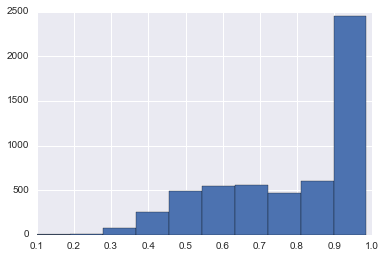

In [18]:
topicdf_nomax['max_prob'].hist()

In [62]:
hostels_df['num_free'] = [len(list(h.split(','))) for h in hostels_df.FREE]
hostels_df['num_serv'] = [(len(list(h.split(',')))-1) for h in hostels_df.SERVICES]
hostels_df['num_food'] = [(len(list(h.split(',')))-1) for h in hostels_df.FOOD_DRINK]
hostels_df['num_ent'] = [(len(list(h.split(',')))-1) for h in hostels_df.ENTERTAINMENT]

In [63]:
hostels_df.head(2)

,Unnamed: 0,rating,desc,FREE,GENERAL,SERVICES,FOOD_DRINK,ENTERTAINMENT,POLICIES,hostel,location,num_awards,rev_highlights,country,city,num_free,num_serv,num_food
0,0,2.0,[stay with us near to the city center of budap...,"[Linen Included , Free City Maps , Towels Incl...","[Breakfast Not Included, Air Conditioning, Out...","[Airport Transfers, Bicycle Hire, Luggage Stor...","[Restaurant, Meals Available, ]","[Wi-Fi, ]",[],Fortuna Botel,"Budapest, Hungary",0,[],Hungary,Budapest,5,6,2
1,1,7.5,[the equity point sea is a lively hostel locat...,"[Free Breakfast , Free Internet Access ]","[Wheelchair Friendly, Security Lockers, Common...","[Luggage Storage, 24 Hour Reception, Tours/Tra...","[Restaurant, Bar, ]","[Games Room, ]","[Age Restriction, Credit Cards Accepted, No Cu...",Equity Point Sea,"Barcelona, Spain",0,"[Perfect Location, Brilliant Staff, Good Clean...",Spain,Barcelona,2,5,2


In [123]:
cv_like = CountVectorizer(ngram_range=(2,2), binary=True, stop_words='english')#, max_features=2500
words_like = cv_like.fit_transform(hostels_df.POLICIES).todense()

summaries = "".join(hostels_df['POLICIES'])
poli_summaries = cv_like.build_analyzer()(summaries)
poli_vocab = Counter(poli_summaries).most_common(40)
poli_vocab = pd.DataFrame(poli_vocab)
poli_vocab.columns=['word','count']

In [201]:
poli_vocab

def no_uni(value):
    return value.decode('unicode_escape').encode('ascii','ignore')

keys = [no_uni(i) for i in list(like_vocab.word[[0,3,4,6,7,10]].values)]
keys
keys = ['Cards Accepted','Taxes Included','Non Smoking','Child Friendly','Smoking Taxes','Age Restriction']

In [206]:
hostels_df.POLICIES[1]

'[Age Restriction, Credit Cards Accepted, No Curfew, Taxes Not Included,]'

In [225]:
def num_polis(value):
    t = value.split(',')
    return len([k for k in keys if (str(k) in str(t))])

In [226]:
num_polis(hostels_df.POLICIES[1])

2

In [227]:
hostels_df['num_poli'] = hostels_df.POLICIES.map(num_polis)

In [228]:
hostels_df.head()

,Unnamed: 0,rating,desc,FREE,GENERAL,SERVICES,FOOD_DRINK,ENTERTAINMENT,POLICIES,hostel,location,num_awards,rev_highlights,country,city,num_free,num_serv,num_food,num_ent,num_poli
0,0,2.0,[stay with us near to the city center of budap...,"[Linen Included , Free City Maps , Towels Incl...","[Breakfast Not Included, Air Conditioning, Out...","[Airport Transfers, Bicycle Hire, Luggage Stor...","[Restaurant, Meals Available, ]","[Wi-Fi, ]",[],Fortuna Botel,"Budapest, Hungary",0,[],Hungary,Budapest,5,6,2,1,0
1,1,7.5,[the equity point sea is a lively hostel locat...,"[Free Breakfast , Free Internet Access ]","[Wheelchair Friendly, Security Lockers, Common...","[Luggage Storage, 24 Hour Reception, Tours/Tra...","[Restaurant, Bar, ]","[Games Room, ]","[Age Restriction, Credit Cards Accepted, No Cu...",Equity Point Sea,"Barcelona, Spain",0,"[Perfect Location, Brilliant Staff, Good Clean...",Spain,Barcelona,2,5,2,1,2
2,2,9.5,[voted no1 hostel in latvia 2013 2012 2011 201...,"[Linen Included , Free City Maps , Towels Incl...","[Security Lockers, Key Card Access, Common Roo...","[Internet Access, Laundry Facilities, Luggage ...","[Bar, Tea & Coffee Making Facilities, ]","[DVD's, Board Games, Foosball, ]","[Credit Cards Accepted, No Curfew, Non Smoking...",The Naughty Squirrel Backpackers Hostel,"Riga, Latvia",16,"[Perfect Location, Superb Staff, Fantastic Cle...",Latvia,Riga,5,7,2,3,3
3,3,8.5,[la chimba hostel has been a favourite of inte...,"[Free Breakfast , Linen Included , Free City M...","[Security Lockers, Common Room, Bicycle Parkin...","[Internet Access, Laundry Facilities, Airport ...","[Tea & Coffee Making Facilities, ]","[DVD's, Board Games, Pool Table, Foosball, ]","[Credit Cards Accepted, No Curfew, Non Smoking,]",La Chimba Hostel,"Santiago, Chile",3,"[Perfect Location, Marvelous Staff, Excellent ...",Chile,Santiago,6,9,1,4,2
4,4,6.3,[our hostel is nice small perfectly located co...,"[Linen Included , Free City Maps , Free Intern...","[Security Lockers, Common Room, Breakfast Not ...","[Internet Access, Laundry Facilities, Bicycle ...","[Mini-Supermarket, Cafe, Tea & Coffee Making F...",[],[],Barcelona 4 Fun Hostel,"Barcelona, Spain",0,"[Wonderful Location, Brilliant Staff]",Spain,Barcelona,3,8,3,0,0


In [179]:
hostels_df.POLICIES[1].split(',')[0]

'[Age Restriction'